In [15]:
import numpy as np

In [16]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [17]:
# train_data를 np.column_stack으로 합치기
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:3])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]]


In [18]:
# target_data 생성 (35개의 1, 14개의 0)
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target[:3])

[1. 1. 1.]


In [19]:
# sklearn에서 모델 훈련시킬때, train과 test 비율에 맞춰서 랜덤하게 추출해주는 함수
from sklearn.model_selection import train_test_split
x_train, x_test_train, y_target, y_test_target = \
    train_test_split(fish_data, fish_target, test_size=0.3) # 매개변수 test_size는 test비율을 의미
print(x_train.shape, y_target.shape)
print(x_test_train.shape, y_target.shape)
print(x_train[:3], y_target[:3])

(34, 2) (34,)
(15, 2) (34,)
[[ 29.7 500. ]
 [ 11.3   8.7]
 [ 35.  680. ]] [1. 0. 1.]


In [20]:
"""모델 생성"""
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors
# The sklearn.neighbors module implements the k-nearest neighbors algorithm.
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train, y_target)

KNeighborsClassifier()

In [21]:
# 내장된 score를 기반한 모델 정확도 확인
print("kn.score = ", kn.score(x_test_train, y_test_target))

# 예측후 직접 예측 정확도 계산
y_pred = kn.predict(x_test_train)
print("y_pred==y_target = ", np.mean(y_pred==y_test_target))
print("y_pred: ", y_pred)
print("y_target: ", y_target)

kn.score =  1.0
y_pred==y_target =  1.0
y_pred:  [1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.]
y_target:  [1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.]


[0.]


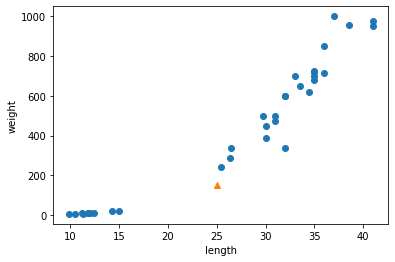

In [22]:
# 예측 확인하기 [[25, 150]] 에 해당하는 값 확인
print(kn.predict([[25,150]]))

import matplotlib.pyplot as plt
plt.scatter(x_train[:, 0], x_train[:,1]) # fish_data내에 x축은 fish_length, y축은 fish_weight
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [23]:
# 예측한 값에 대한 이웃까지의 거리와 이웃 샘플의 인덱스를 반환
distances, indexes = kn.kneighbors([[25, 150]])
print(f"distances= {distances}, indexes= {indexes}")

distances= [[ 92.00086956 130.48375378 130.73859415 137.17988191 140.00603558]], indexes= [[24  5 25 29 32]]


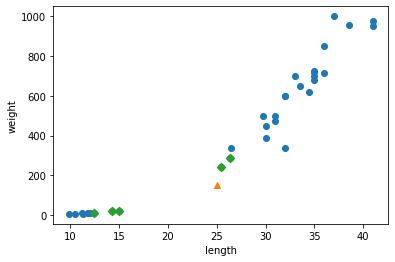

In [24]:
# 위 모델을 통해서 확인한 예측값의 distances와 indexes를 기준으로 그림 그려서 확인
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(x_train[indexes, 0], x_train[indexes, 1], marker='D')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

41.0 1000.0


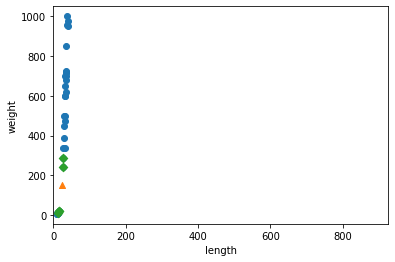

In [25]:
# 훈련데이터에 대한 정규화가 안되어 있기 때문에 x,y에 대해서 동일한 비율로 그림 그려보기 

print(max(x_train[:,0]), max(x_train[:,1]))

plt.scatter(x_train[:, 0], x_train[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(x_train[indexes, 0], x_train[indexes, 1], marker='D')
plt.xlim( (0,925))# x에 해당하는 length x_train[:,0]은 최대값이 39.5, y에 해당하는 x_train[:,1] (weight)값은 최대 925이기에 비율 맞춤
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

[[ 0.26734862  0.16931183]
 [-1.52529123 -1.30479357]
 [ 0.78370684  0.70938708]]


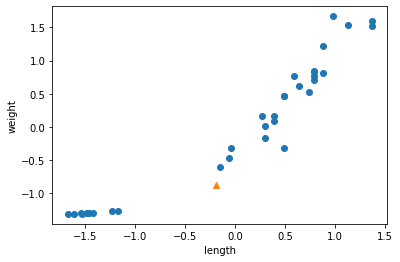

In [26]:
# 데이터에 대한 정규화 처리
mean = np.mean(x_train, axis=0) # length와 weight 에 대해서 각각 행 기준으로 
std = np.std(x_train, axis=0)

x_train_scaled = (x_train-mean)/std
print(x_train_scaled[:3])

new = ([25, 150]-mean) /std # 예측값에 대해서도 정규화 처리
plt.scatter(x_train_scaled[:, 0], x_train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [27]:
kn.fit(x_train_scaled, y_target)

# 훈련데이터로 모델 평가하기
x_test_scaled = (x_test_train - mean)/ std
kn.score(x_test_scaled, y_test_target)

1.0

[1.]
[[0.27877576 0.43873725 0.5885127  0.86939089 0.8888705 ]] [[24 32 33  9  7]]


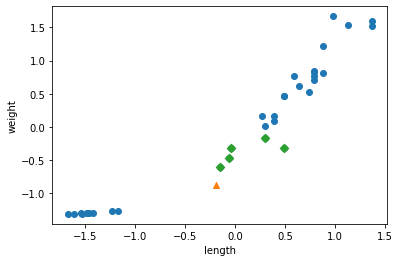

In [28]:
print(kn.predict([new]))
distances, indexes = kn.kneighbors([new])
print(distances, indexes)

plt.scatter(x_train_scaled[:,0], x_train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.scatter(x_train_scaled[indexes, 0], x_train_scaled[indexes, 1], marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()